<a href="https://colab.research.google.com/github/YUG0123/WARP-26-INSPECT/blob/main/Yug_task1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
transform=transforms.Compose([
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
transform_t=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [ ]:
train_data=datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transform,
    target_transform=None
)
test_data=datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transform_t,
    target_transform=None,
)

In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [ ]:
train_data[0]

(tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.424

In [ ]:
train_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
class_names=train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
image,label=train_data[0]

In [ ]:
image.shape,label

(torch.Size([1, 28, 28]), 5)

Text(0.5, 1.0, '5')

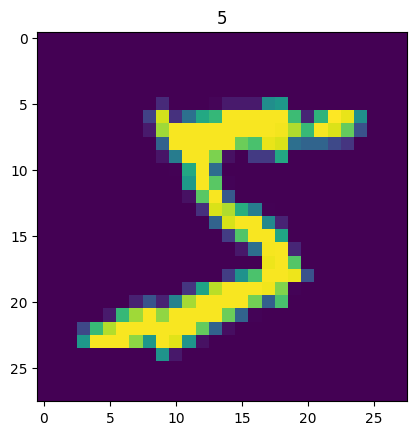

In [ ]:
plt.imshow(image.squeeze())
plt.title(label)

In [ ]:
from torch.utils.data import DataLoader
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=64,
                            shuffle=True
                            )
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=64,
                           shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79f653ab07d0>,
 <torch.utils.data.dataloader.DataLoader at 0x79f6539f4bc0>)

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
from torch import nn
class MNISTMODEL(nn.Module):
  def __init__(self,
              input_shape:int,
              hidden_units:int,
              output_shape:int
              ):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        # nn.Softmax(dim=1)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
model=MNISTMODEL(
    input_shape=28*28,
    hidden_units=64,
    output_shape=10
)

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model.parameters(),
                          lr=0.001)

In [ ]:
from tqdm.auto import tqdm
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

epochs=10
for epoch in tqdm(range(epochs)):
    train_loss=0
    for batch,(X,y) in enumerate(train_dataloader):
        model.train()
        y_pred=model(X)
        loss=loss_fn(y_pred,y)
        train_loss+=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch%400==0:
            print(f"looked at  {batch*len(X)}/{len(train_dataloader.dataset)} samples")
    train_loss/=len(train_dataloader)

    test_loss,test_acc=0,0
    model.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            test_pred=model(X_test)
            test_loss+=loss_fn(test_pred,y_test)
            test_acc+= accuracy_fn(y_true=y_test,
                                 y_pred=test_pred.argmax(dim=1))

        test_loss/=len(test_dataloader)
        test_acc/=len(test_dataloader)
    print(f"\nTrain Loaaa:{train_loss:.4f} | test_lloss:{test_loss:.4f} | test_acc:{test_acc:.4f}")

  0%|          | 0/10 [00:00<?, ?it/s]

looked at  0/60000 samples
looked at  25600/60000 samples
looked at  51200/60000 samples

Train Loaaa:0.3310 | test_lloss:0.1639 | test_acc:94.8547
looked at  0/60000 samples
looked at  25600/60000 samples
looked at  51200/60000 samples

Train Loaaa:0.1556 | test_lloss:0.1000 | test_acc:96.8650
looked at  0/60000 samples
looked at  25600/60000 samples
looked at  51200/60000 samples

Train Loaaa:0.1214 | test_lloss:0.0973 | test_acc:96.8153
looked at  0/60000 samples
looked at  25600/60000 samples
looked at  51200/60000 samples

Train Loaaa:0.1004 | test_lloss:0.0821 | test_acc:97.4224
looked at  0/60000 samples
looked at  25600/60000 samples
looked at  51200/60000 samples

Train Loaaa:0.0880 | test_lloss:0.0847 | test_acc:97.3029
looked at  0/60000 samples
looked at  25600/60000 samples
looked at  51200/60000 samples

Train Loaaa:0.0787 | test_lloss:0.0800 | test_acc:97.6314
looked at  0/60000 samples
looked at  25600/60000 samples
looked at  51200/60000 samples

Train Loaaa:0.0742 | t

In [ ]:
import torch
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()


        self.conv1 = nn.Conv2d(1, 12, kernel_size=3)
        self.bn1 = nn.BatchNorm2d(12)
        self.relu1 = nn.ReLU()


        self.conv2 = nn.Conv2d(12, 16, kernel_size=3)
        self.bn2 = nn.BatchNorm2d(16)
        self.relu2 = nn.ReLU()


        self.pool = nn.MaxPool2d(2)


        self.conv3 = nn.Conv2d(16, 24, kernel_size=3)
        self.bn3 = nn.BatchNorm2d(24)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(24, 32, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.gap = nn.AdaptiveAvgPool2d(1)


        self.fc = nn.Linear(32, 10)

    def forward(self, x):

        x = self.relu1(self.bn1(self.conv1(x)))
        x = self.relu2(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = self.relu3(self.bn3(self.conv3(x)))
        x= self.relu3(self.bn4(self.conv4(x)))
        x = self.pool2(x)
        x = self.gap(x)


        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

model_1 = CNNModel()
print(f'Total Parameters: {sum(p.numel() for p in model_1.parameters() if p.requires_grad)}')



Total Parameters: 12786


In [ ]:

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_1.parameters(),
                          lr=0.001,)
from tqdm.auto import tqdm
torch.manual_seed(42)

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

epochs=15
train_losses = []
test_losses = []
test_accuracies = []
for epoch in tqdm(range(epochs)):
    train_loss=0
    for batch,(X,y) in enumerate(train_dataloader):
        # X, y = X.to(device), y.to(device)
        model_1.train()
        y_pred=model_1(X)
        loss=loss_fn(y_pred,y)
        train_loss+=loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch%400==0:
            print(f"looked at  {batch*len(X)}/{len(train_dataloader.dataset)} samples")
    train_loss/=len(train_dataloader)

    test_loss,test_acc=0,0
    model_1.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            # X_test, y_test = X_test.to(device), y_test.to(device) # Move data to target device
            test_pred=model_1(X_test)
            test_loss+=loss_fn(test_pred,y_test).item()
            test_acc+= accuracy_fn(y_true=y_test,
                                 y_pred=test_pred.argmax(dim=1))

        test_loss/=len(test_dataloader)
        test_acc/=len(test_dataloader)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)
    print(f"\nTrain Loaaa:{train_loss:.4f} | test_lloss:{test_loss:.4f} | test_acc:{test_acc:.4f}")

  0%|          | 0/15 [00:00<?, ?it/s]

looked at  0/60000 samples
looked at  25600/60000 samples
looked at  51200/60000 samples

Train Loaaa:0.5272 | test_lloss:0.1477 | test_acc:96.3674
looked at  0/60000 samples
looked at  25600/60000 samples
looked at  51200/60000 samples

Train Loaaa:0.1136 | test_lloss:0.0738 | test_acc:98.0295
looked at  0/60000 samples
looked at  25600/60000 samples
looked at  51200/60000 samples

Train Loaaa:0.0822 | test_lloss:0.0628 | test_acc:98.1389
looked at  0/60000 samples
looked at  25600/60000 samples
looked at  51200/60000 samples

Train Loaaa:0.0688 | test_lloss:0.0528 | test_acc:98.4475
looked at  0/60000 samples
looked at  25600/60000 samples
looked at  51200/60000 samples

Train Loaaa:0.0614 | test_lloss:0.0515 | test_acc:98.2783
looked at  0/60000 samples
looked at  25600/60000 samples
looked at  51200/60000 samples

Train Loaaa:0.0569 | test_lloss:0.0513 | test_acc:98.4176
looked at  0/60000 samples
looked at  25600/60000 samples
looked at  51200/60000 samples

Train Loaaa:0.0522 | t

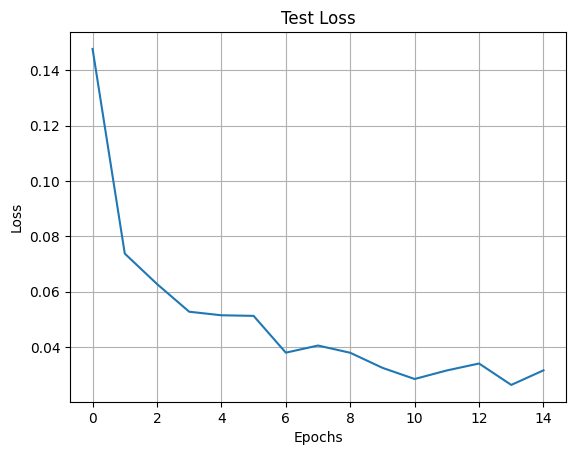

In [ ]:
plt.plot(test_losses)
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

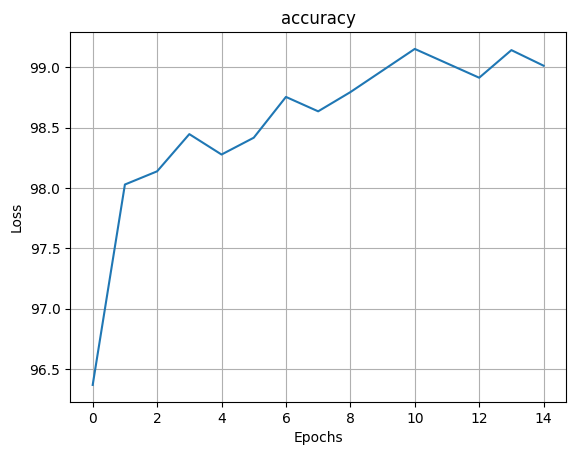

In [ ]:
plt.plot(test_accuracies)
plt.title("accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [ ]:

!git config --global user.email "kamaliayug11@gmail.com"
!git config --global user.name YUG0123


!git clone https://YOUR_TOKEN@github.com/YourGitHubUsername/WARP-26-INSPECT.git
%cd WARP-26-INSPECT


!git checkout -b task-2-contribution

!cp /content/mnist_cnn.ipynb .


!git add .
!git commit -m "Complete Task-2: MNIST CNN <20k params"
!git push origin task-2-contribution